In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import Ridge, Lasso

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [2]:
df= pd.read_csv('avocado.csv')

In [3]:
df = df.iloc[: , 1:]

In [4]:
df.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [5]:
df.shape

(18249, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [7]:
df.describe

<bound method NDFrame.describe of              Date  AveragePrice  Total Volume     4046       4225    4770  \
0      2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1      2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2      2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3      2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4      2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags

In [8]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<Axes: >

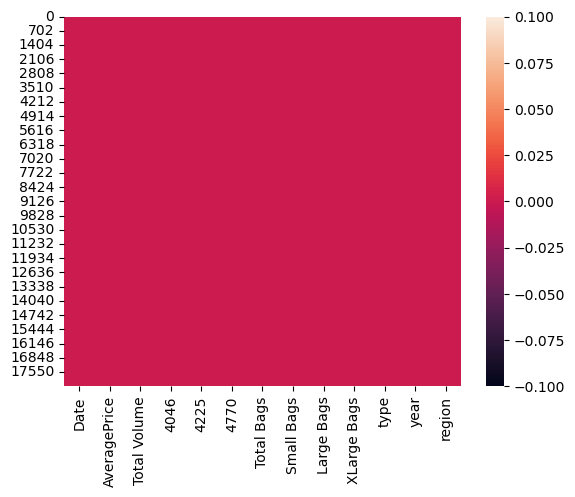

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [11]:
df['Date'].nunique()

169

<Axes: xlabel='AveragePrice', ylabel='Density'>

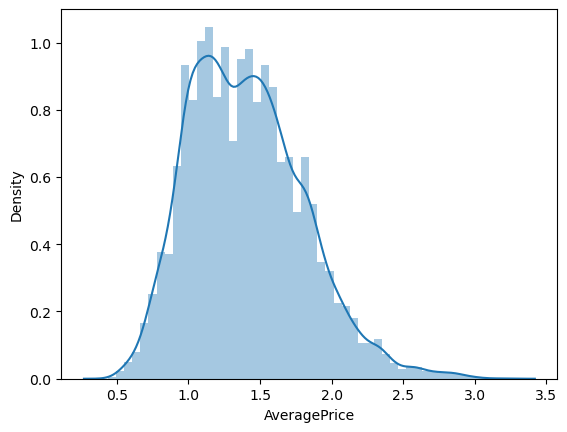

In [12]:
sns.distplot(df['AveragePrice'])

<Axes: xlabel='AveragePrice', ylabel='Density'>

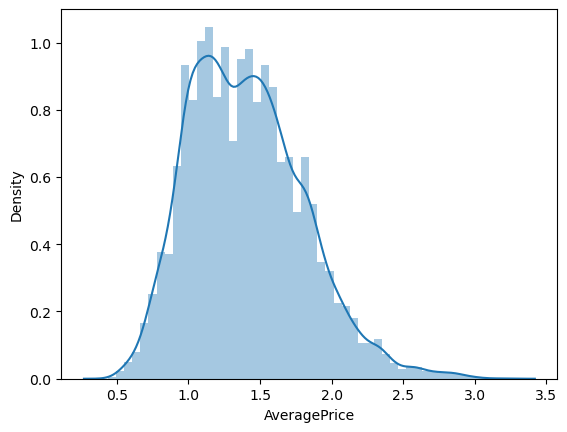

In [13]:
# Average Price
sns.distplot(df['AveragePrice'])

<Axes: xlabel='Total Volume', ylabel='year'>

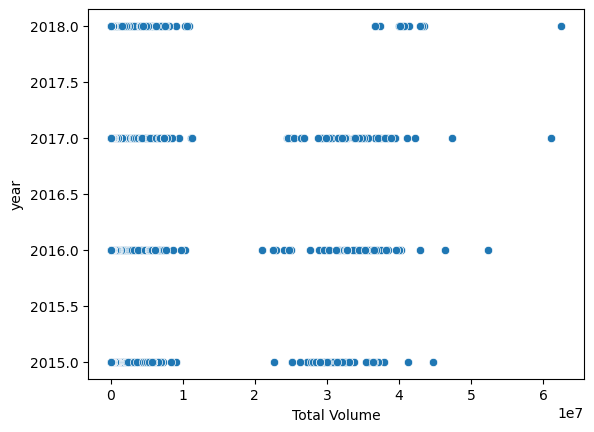

In [14]:
sns.scatterplot(x='Total Volume',y='year',data=df)

In [15]:
df['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

<Axes: xlabel='year', ylabel='Total Volume'>

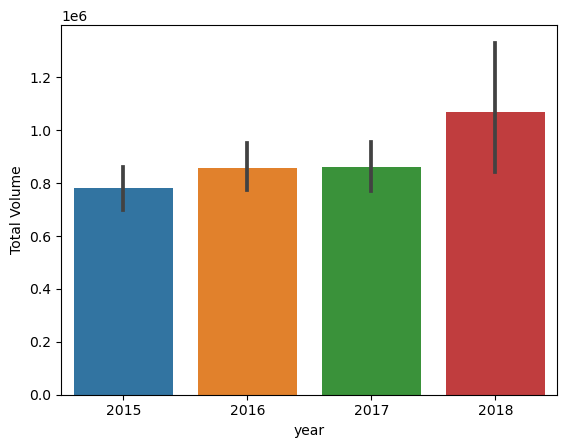

In [16]:
sns.barplot(y='Total Volume',x='year', data=df)

In [17]:
df.groupby('year')['Total Volume'].sum()

year
2015    4.385469e+09
2016    4.820890e+09
2017    4.934306e+09
2018    1.382738e+09
Name: Total Volume, dtype: float64

In [18]:
df.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [19]:
df['AveragePrice'].nunique()

259

In [20]:
df.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

([<matplotlib.patches.Wedge at 0x1598aa86a10>,
 [Text(0.300862058141864, 1.0580557745084338, 'conventional'),
  Text(-0.30086215720419374, -1.0580557463396905, 'organic')],
 [Text(0.16410657716828944, 0.5771213315500547, '41.18%'),
  Text(-0.1641066312022875, -0.5771213161852856, '58.82%')])

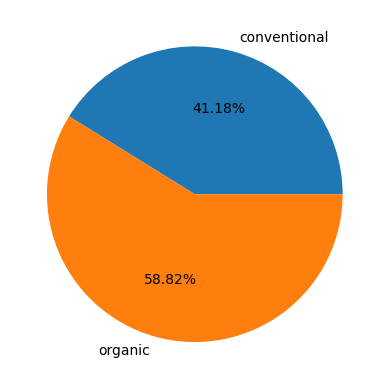

In [21]:
plt.pie( df.groupby('type')['AveragePrice'].mean().values, labels= df.groupby('type')['AveragePrice'].mean().index, autopct='%1.2f%%'  )

In [22]:
df.groupby('type')['Total Volume'].sum()

type
conventional    1.508722e+10
organic         4.361817e+08
Name: Total Volume, dtype: float64

In [23]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

<Axes: xlabel='year', ylabel='Total Volume'>

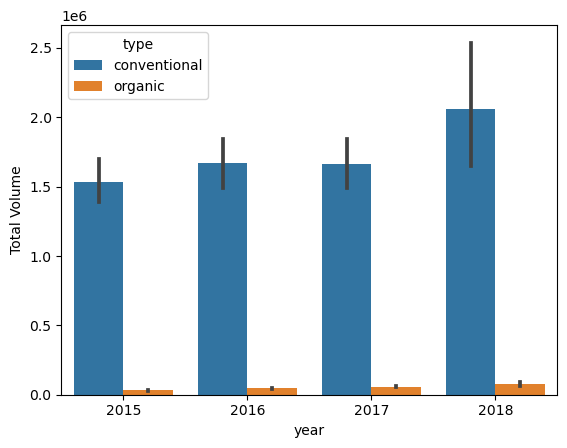

In [24]:
sns.barplot(y='Total Volume',x='year',hue='type', data=df)

In [25]:

df.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [26]:
# Which type sold in which area

df['region'].nunique()

54

In [27]:
df.groupby(['region','type'])['AveragePrice'].mean().head(60)

region               type        
Albany               conventional    1.348757
                     organic         1.773314
Atlanta              conventional    1.068817
                     organic         1.607101
BaltimoreWashington  conventional    1.344201
                     organic         1.724260
Boise                conventional    1.076036
                     organic         1.620237
Boston               conventional    1.304379
                     organic         1.757396
BuffaloRochester     conventional    1.382308
                     organic         1.651361
California           conventional    1.105444
                     organic         1.685207
Charlotte            conventional    1.275089
                     organic         1.936982
Chicago              conventional    1.369349
                     organic         1.744201
CincinnatiDayton     conventional    1.015503
                     organic         1.402899
Columbus             conventional    1.066272


<Axes: xlabel='year', ylabel='AveragePrice'>

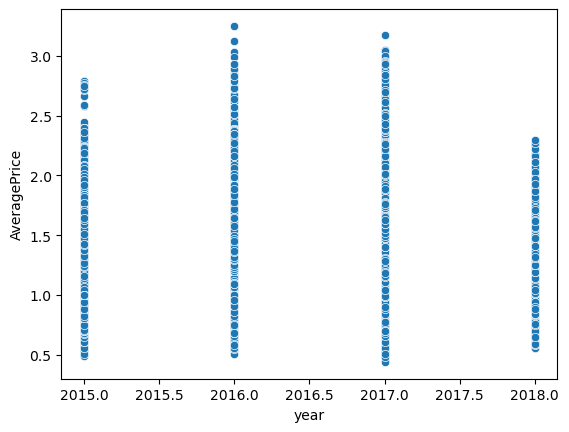

In [28]:
sns.scatterplot(x='year',y='AveragePrice', data=df)

In [29]:
df.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

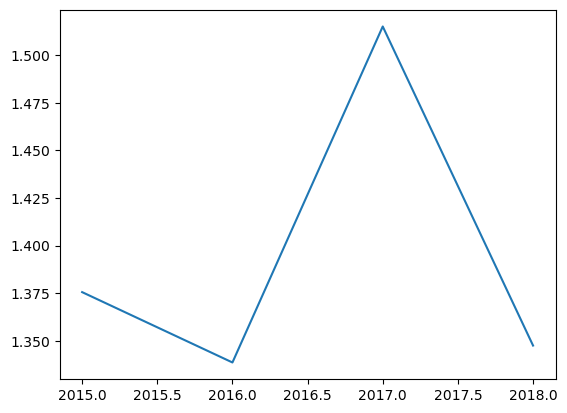

In [30]:
plt.plot(df.groupby('year')['AveragePrice'].mean().index, df.groupby('year')['AveragePrice'].mean().values  )

<Axes: xlabel='Total Volume', ylabel='AveragePrice'>

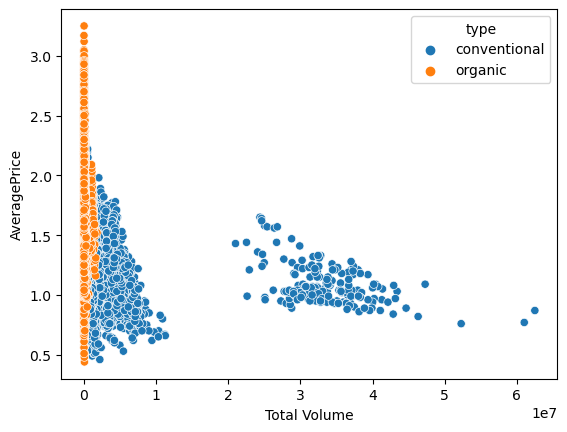

In [31]:
sns.scatterplot(x='Total Volume',y='AveragePrice',hue='type',data=df)

In [32]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


([<matplotlib.axis.YTick at 0x1598ada74d0>,
 [Text(0, 1, '0.0'),
  Text(0, 500000001, '0.5'),
  Text(0, 1000000001, '1.0'),
  Text(0, 1500000001, '1.5'),
  Text(0, 2000000001, '2.0'),
  Text(0, 2500000001, '2.5'),
  Text(0, 3000000001, '3.0'),
  Text(0, 3500000001, '3.5'),
  Text(0, 4000000001, '4.0'),
  Text(0, 4500000001, '4.5'),
  Text(0, 5000000001, '5.0'),
  Text(0, 5500000001, '5.5')])

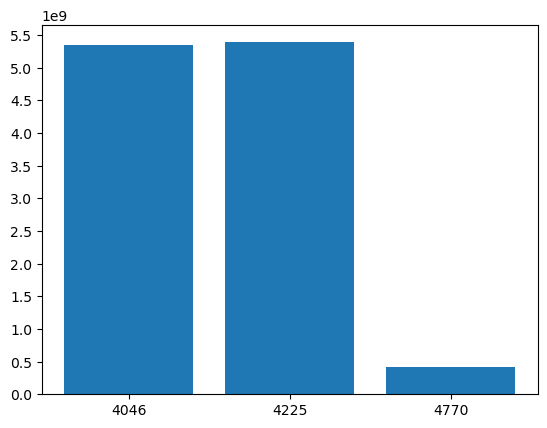

In [33]:
plt.bar(  ['4046','4225','4770'],[df['4046'].sum(),df['4225'].sum(),df['4770'].sum()])
plt.yticks(range(1,6000000000,500000000))

In [34]:
df['4046'].sum()

5347110739.26

In [35]:
df['4225'].sum()

5386275717.93

In [36]:
df['4770'].sum()

416802342.12999994

In [37]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [38]:
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

<Axes: xlabel='year', ylabel='AveragePrice'>

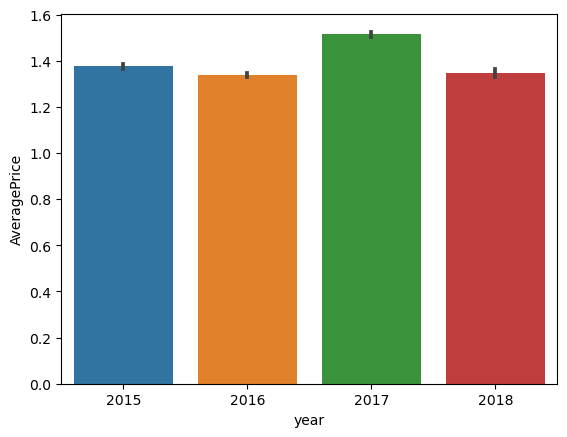

In [39]:
sns.barplot(x='year',y='AveragePrice',data=df)

In [40]:
df['Date'] = pd.to_datetime(df['Date'])

In [41]:

df['Date'].dt.month

0        12
1        12
2        12
3        12
4        11
         ..
18244     2
18245     1
18246     1
18247     1
18248     1
Name: Date, Length: 18249, dtype: int64

In [42]:
df['Month']=df['Date'].dt.month

<Axes: xlabel='Month', ylabel='AveragePrice'>

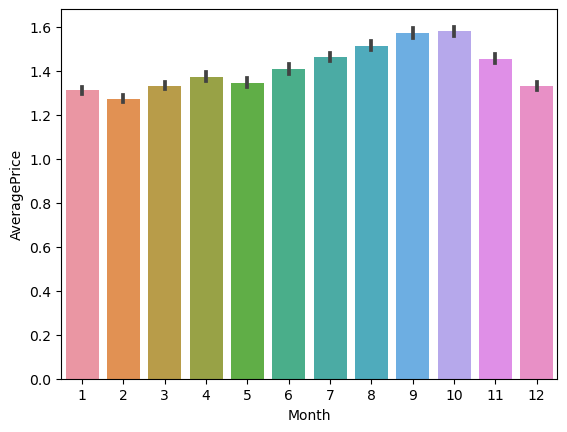

In [43]:
sns.barplot(x='Month',y='AveragePrice',data=df)

In [44]:
df.groupby('Month')['AveragePrice'].mean().sort_values()

Month
2     1.274387
1     1.311019
12    1.331112
3     1.332255
5     1.346601
4     1.374380
6     1.408964
11    1.455563
7     1.462077
8     1.512514
9     1.572654
10    1.579683
Name: AveragePrice, dtype: float64

<Axes: xlabel='Month', ylabel='AveragePrice'>

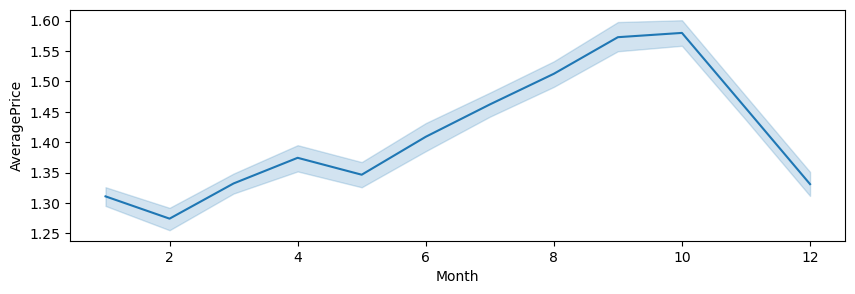

In [45]:
plt.figure(figsize=(10,3))
sns.lineplot(x='Month',y='AveragePrice',data=df)

<Axes: xlabel='Month', ylabel='AveragePrice'>

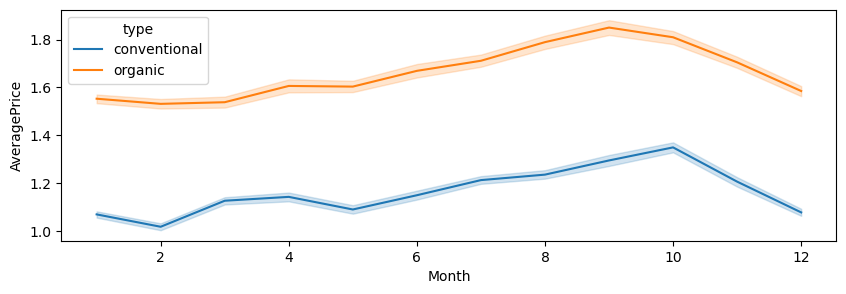

In [46]:
plt.figure(figsize=(10,3))
sns.lineplot(x='Month',y='AveragePrice',hue='type',data=df)

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'AveragePrice'}>,
        <Axes: title={'center': 'Total Volume'}>],
       [<Axes: title={'center': '4046'}>,
        <Axes: title={'center': '4225'}>,
        <Axes: title={'center': '4770'}>],
       [<Axes: title={'center': 'Total Bags'}>,
        <Axes: title={'center': 'Small Bags'}>,
        <Axes: title={'center': 'Large Bags'}>],
       [<Axes: title={'center': 'XLarge Bags'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'Month'}>]], dtype=object)

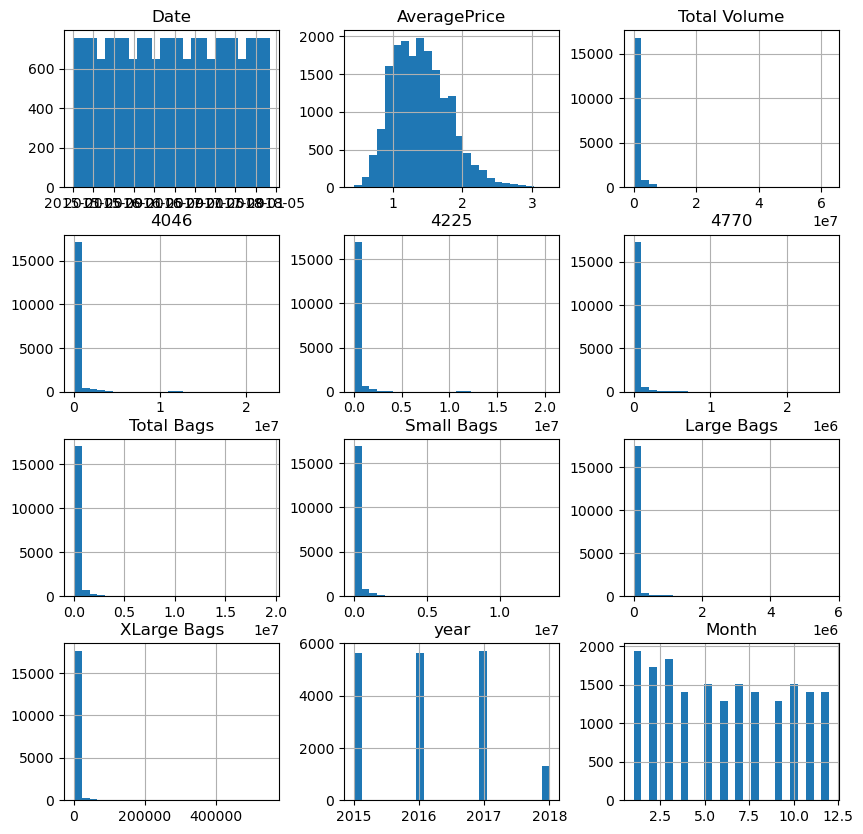

In [47]:
# Conclusion:  Price hike for both type of avacado during 8,9,10 months
# Jan-FEB-March  is the season for avacado, so price is comapritvely low
# in DEC, every one wants to clear stock for nre production , so price came down
df.hist(figsize=(10,10), bins=25)

In [48]:
df.columns.T

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month'],
      dtype='object')

In [49]:
df['Total Bags'].sum()

4373175798.389999

In [50]:
df['Small Bags'].sum() + df['Large Bags'].sum() +df['XLarge Bags'].sum()

4373175785.39

In [51]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050


In [52]:
correlation= list(df.columns)

In [53]:
correlation.pop(1)

'AveragePrice'

In [54]:
correlation.insert(14,'AveragePrice')

In [55]:
corr=df[correlation]

<Axes: >

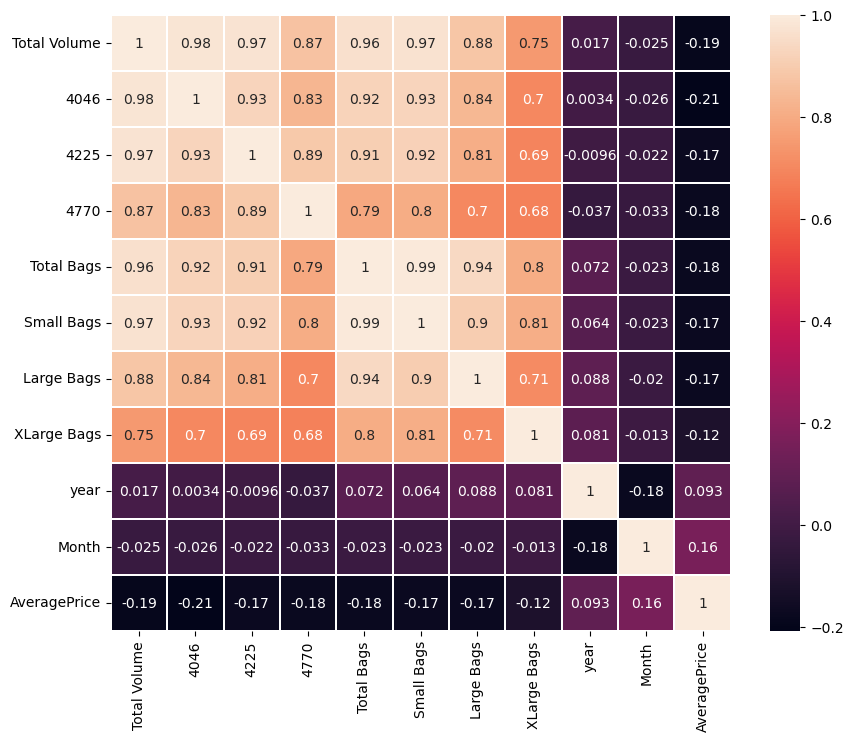

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(corr.corr(), annot=True, linecolor='white',linewidths=.25)

In [57]:
#VIF to find multi colinearity
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month'],
      dtype='object')

In [58]:
d=df.drop(['Date','type','region','AveragePrice','Total Bags','year'], axis=1)

In [59]:
d

,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,Month
0,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,12
1,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,12
2,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,12
3,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,12
4,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,11
...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,2
18245,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,1
18246,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,1
18247,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,1


<Axes: >

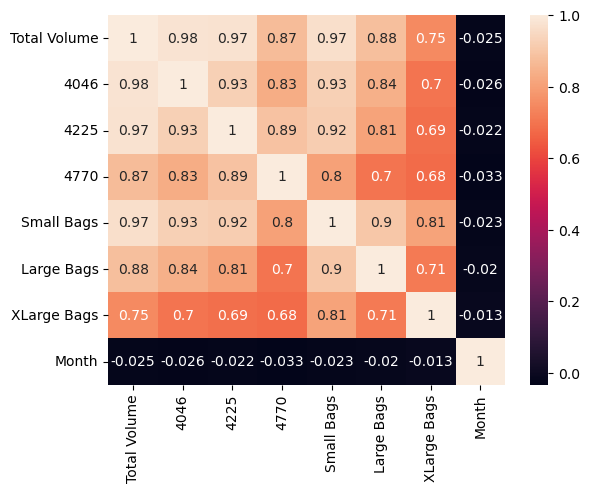

In [60]:
sns.heatmap(d.corr(),annot=True)

In [61]:
sc= StandardScaler()
scaled= sc.fit_transform(d)
scaled

array([[-0.22771641, -0.23081597, -0.1999022 , ..., -0.22235202,
        -0.17557961,  1.64763162],
       [-0.23042664, -0.23110251, -0.20805446, ..., -0.22233464,
        -0.17557961,  1.64763162],
       [-0.21208462, -0.23100731, -0.1544779 , ..., -0.22231148,
        -0.17557961,  1.64763162],
       ...,
       [-0.24233073, -0.2306933 , -0.24309014, ..., -0.22256082,
        -0.17557961, -1.46495942],
       [-0.24162464, -0.2304279 , -0.24265143, ..., -0.2225293 ,
        -0.17557961, -1.46495942],
       [-0.24125273, -0.22934712, -0.24317042, ..., -0.22262764,
        -0.17557961, -1.46495942]])

In [62]:
VIF= pd.DataFrame()
VIF['features']= d.columns
VIF['vif']= [variance_inflation_factor(d.values,i) for i in range(len(d.columns))]

In [63]:
VIF

,features,vif
0,Total Volume,5.202516e+09
1,4046,6.933785e+08
2,4225,6.320930e+08
3,4770,4.963920e+06
4,Small Bags,2.426346e+08
5,Large Bags,2.569115e+07
6,XLarge Bags,1.326561e+05
7,Month,1.044053e+00


In [64]:
df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [65]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month'],
      dtype='object')

In [66]:
num= df.select_dtypes(np.number)

In [67]:
num.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
dtype: float64

AveragePrice       Axes(0.125,0.712609;0.133621x0.167391)
Total Volume    Axes(0.285345,0.712609;0.133621x0.167391)
4046             Axes(0.44569,0.712609;0.133621x0.167391)
4225            Axes(0.606034,0.712609;0.133621x0.167391)
4770            Axes(0.766379,0.712609;0.133621x0.167391)
Total Bags         Axes(0.125,0.511739;0.133621x0.167391)
Small Bags      Axes(0.285345,0.511739;0.133621x0.167391)
Large Bags       Axes(0.44569,0.511739;0.133621x0.167391)
XLarge Bags     Axes(0.606034,0.511739;0.133621x0.167391)
year            Axes(0.766379,0.511739;0.133621x0.167391)
Month               Axes(0.125,0.31087;0.133621x0.167391)
dtype: object

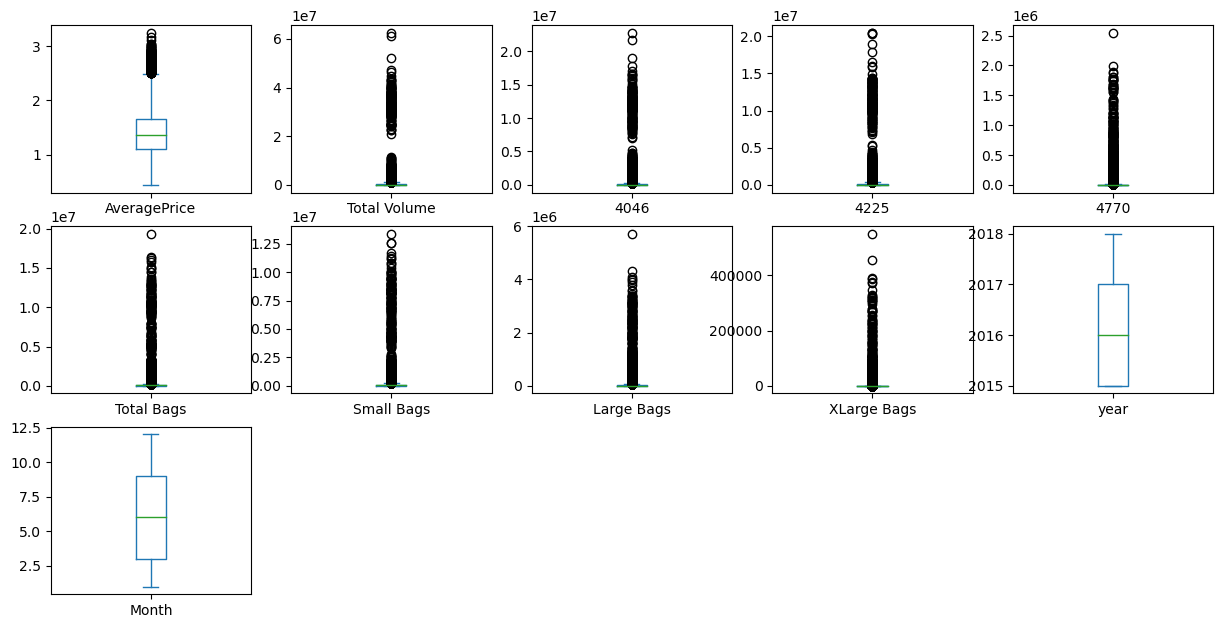

In [68]:
# data is skewed
df.plot(kind='box', subplots=True, layout=(4,5),figsize=(15,10))

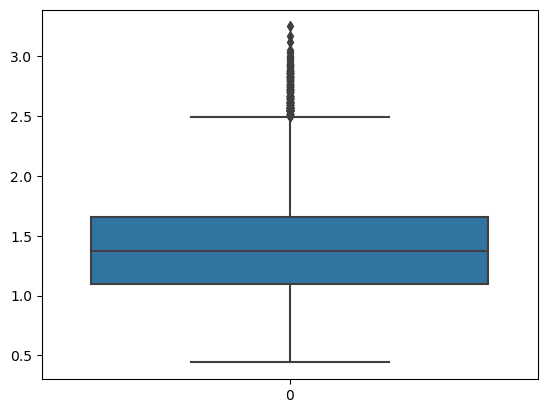

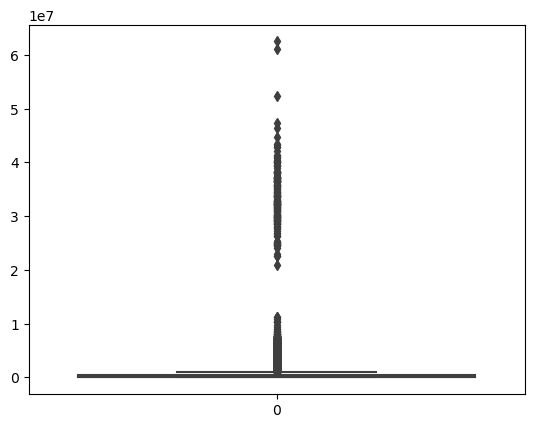

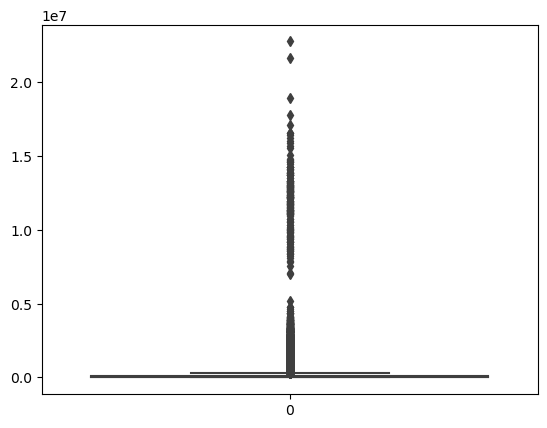

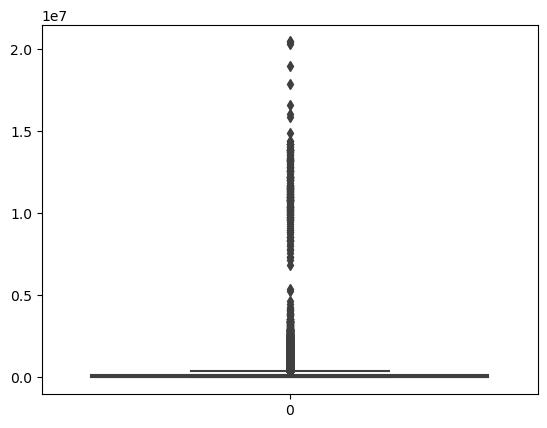

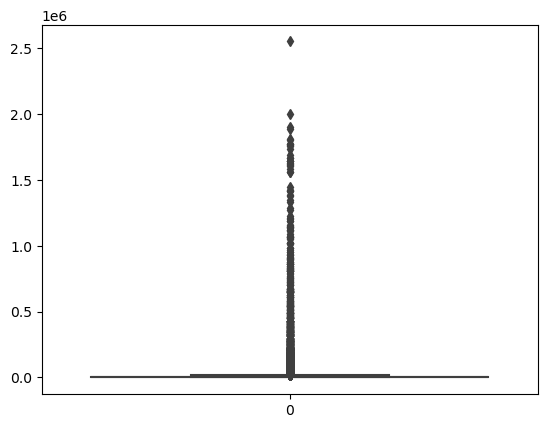

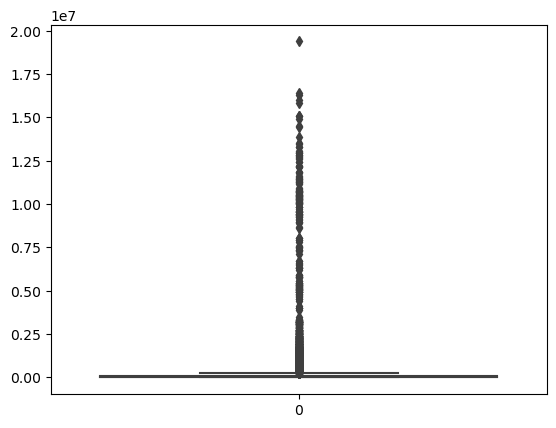

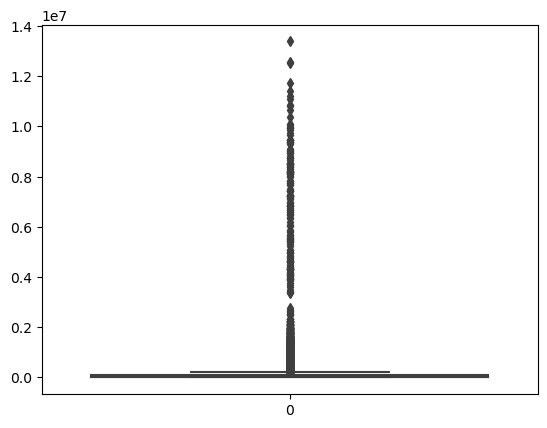

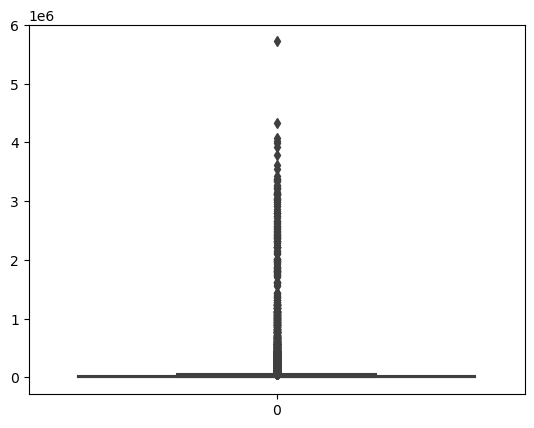

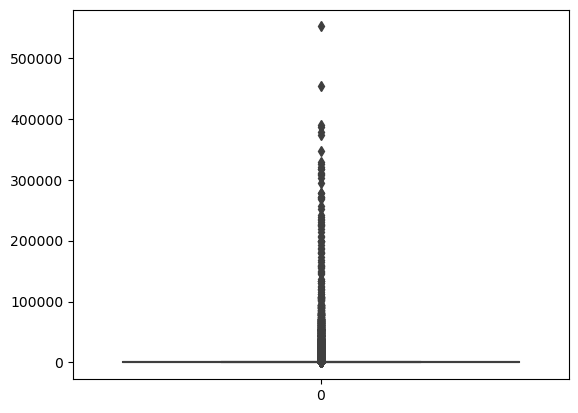

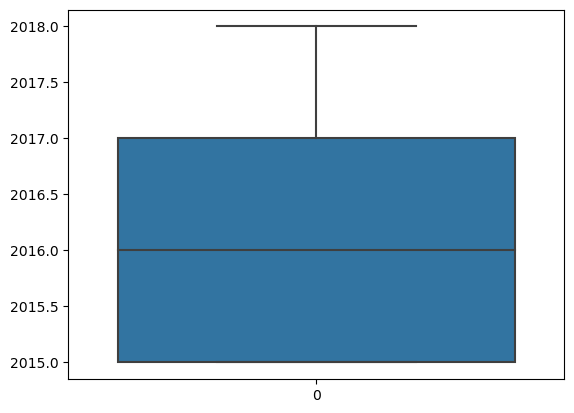

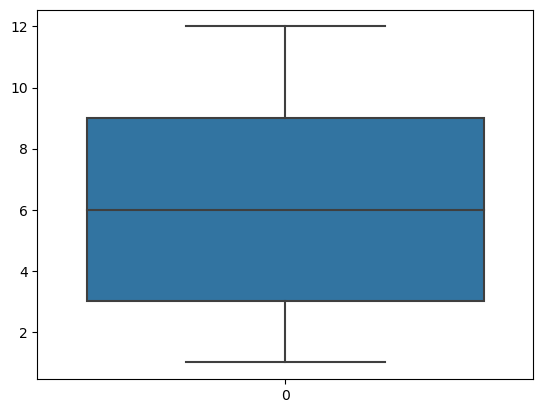

In [69]:
for i in num:
    sns.boxplot(df[i])
    plt.show()

In [70]:
# All columns have outliers except, year and month
#lets handle
from scipy.stats import zscore
# calculate z score
z=np.abs(zscore(num))
print(z)

       AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          0.188689      0.227716  0.230816  0.199902  0.212091    0.234170   
1          0.139020      0.230427  0.231103  0.208054  0.211997    0.233350   
2          1.182069      0.212085  0.231007  0.154478  0.211325    0.234730   
3          0.809551      0.223444  0.230741  0.185350  0.211864    0.237096   
4          0.312861      0.231538  0.230891  0.208719  0.211834    0.236718   
...             ...           ...       ...       ...       ...         ...   
18244      0.556347      0.241373  0.230017  0.243857  0.212540    0.229301   
18245      0.755023      0.242296  0.230693  0.242277  0.212540    0.233594   
18246      1.152375      0.242331  0.230693  0.243090  0.205766    0.233463   
18247      1.301382      0.241625  0.230428  0.242651  0.205774    0.231866   
18248      0.531512      0.241253  0.229347  0.243170  0.210450    0.230807   

       Small Bags  Large Bags  XLarge Bags      yea

In [71]:
# assign the value to df_new which are less the threshold
data= df[(z<3).all(axis=1)]
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [72]:
df.shape

(18249, 14)

In [73]:
# Decide to remove ooutliers here.
df.shape[0]-data.shape[0]

598

In [74]:
# 467 records have been deleted as outliers
num_new=data.drop(['AveragePrice','Date','type','region'], axis=1)
num_new.skew()

Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
Month           0.107408
dtype: float64

In [75]:
num_new.head(2)

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12


In [76]:
num_new.shape

(17651, 10)

In [77]:
Y=data['AveragePrice']

In [78]:
Y.shape

(17651,)

In [79]:
from sklearn.preprocessing import power_transform
transformed=power_transform(num_new)
transformed=pd.DataFrame(transformed)
transformed.columns=num_new.columns
transformed.skew()

Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
year            0.227731
Month          -0.146554
dtype: float64

In [80]:
transformed.head(3)

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.210647,1.491383
1,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.210647,1.491383
2,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.210647,1.491383


In [81]:
transformed.shape

(17651, 10)

In [82]:
#pcs_data=df.select_dtypes(np.number)
#pcs_data.shape

sc= StandardScaler()
scaled= sc.fit_transform(transformed)
from sklearn.decomposition import PCA
pca= PCA()

In [83]:
principal_component=pca.fit_transform(scaled)

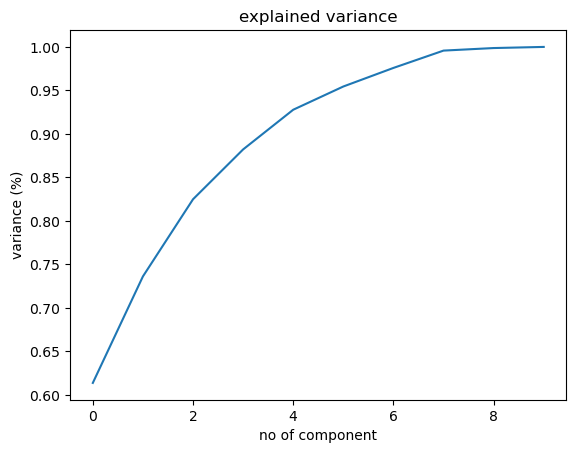

In [84]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of component')
plt.ylabel('variance (%)')
plt.title('explained variance')
plt.show()

In [85]:
# Graph shows 7 components has explained 97% variance of all features, so use 7
pca=PCA(n_components=7)
new_data= pca.fit_transform(scaled)
principal_x= pd.DataFrame(new_data,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

In [86]:
principal_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.054280,-1.926906,-0.316834,-0.143358,0.500275,0.465078,-0.267559
1,-1.107373,-1.906494,-0.344648,-0.129888,0.486420,0.545947,-0.334382
2,-0.789543,-1.996824,-0.231603,-0.139444,0.529697,0.754814,-0.207641
3,-1.033615,-1.969558,-0.263836,-0.167128,0.374129,0.570255,-0.093852
4,-1.156035,-1.794040,-0.153531,-0.183083,0.252861,0.546405,-0.135038
...,...,...,...,...,...,...,...
17646,-1.600427,2.467002,-0.281279,-0.174348,0.535261,-0.404351,0.036870
17647,-1.741173,2.686826,0.090849,-0.080746,0.448342,-0.203622,0.015879
17648,-1.328701,2.398892,0.403804,0.490844,0.775516,0.781441,0.848922
17649,-1.191110,2.395605,0.409735,0.450230,0.811754,0.743474,0.831159


In [87]:
# we will drop Date column, because we have already extracted year and month from it.

#df.select_dtypes('O')  #  these are nominal categorical features
df['region'].nunique()

54

In [88]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [89]:
#Binary Encoding
cat= data[['type','region']]
 
cat

,type,region
0,conventional,Albany
1,conventional,Albany
2,conventional,Albany
3,conventional,Albany
4,conventional,Albany
...,...,...
18244,organic,WestTexNewMexico
18245,organic,WestTexNewMexico
18246,organic,WestTexNewMexico
18247,organic,WestTexNewMexico


In [ ]:
pip install category_encoders

In [113]:
import category_encoders as ce
encoder= ce.BinaryEncoder(cols=['type','region'],return_df=True)
# Fit and Trabsform data

data_encoded= encoder.fit_transform(cat)

In [114]:
data_encoded

,type_0,type_1,region_0,region_1,region_2,region_3,region_4,region_5
0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
18244,1,0,1,1,0,1,0,1
18245,1,0,1,1,0,1,0,1
18246,1,0,1,1,0,1,0,1
18247,1,0,1,1,0,1,0,1


In [115]:
#BaseN Encoding
encoder_N= ce.BaseNEncoder(cols=['type','region'],return_df=True,base=5)
data_encoded_basen= encoder_N.fit_transform(cat)

In [94]:
data_encoded_basen

,type_0,region_0,region_1,region_2
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1
...,...,...,...,...
18244,2,2,0,3
18245,2,2,0,3
18246,2,2,0,3
18247,2,2,0,3


In [116]:
sc= StandardScaler()
scaled_cat=sc.fit_transform(data_encoded_basen)
scaled_cat= pd.DataFrame(scaled_cat)
scaled_cat.columns= data_encoded_basen.columns

In [117]:
scaled_cat

,type_0,region_0,region_1,region_2
0,-1.019047,-1.002296,-1.284392,-0.727015
1,-1.019047,-1.002296,-1.284392,-0.727015
2,-1.019047,-1.002296,-1.284392,-0.727015
3,-1.019047,-1.002296,-1.284392,-0.727015
4,-1.019047,-1.002296,-1.284392,-0.727015
...,...,...,...,...
17646,0.981309,2.179062,-1.284392,0.698348
17647,0.981309,2.179062,-1.284392,0.698348
17648,0.981309,2.179062,-1.284392,0.698348
17649,0.981309,2.179062,-1.284392,0.698348


In [97]:
principal_x.shape  , scaled_cat.shape

((17651, 7), (17651, 4))

In [98]:
data_encoded.shape

(17651, 8)

In [99]:
X=pd.concat([principal_x,scaled_cat],axis=1,join='inner')

In [100]:
X1=pd.concat([principal_x,data_encoded],axis=1,join='inner')

In [101]:
principal_x.shape  , data_encoded.shape

((17651, 7), (17651, 8))

In [102]:
X.shape

(17651, 11)

In [103]:
X1.shape

(17053, 15)

In [104]:
X1.shape

(17053, 15)

In [105]:
Y= df['AveragePrice']

In [106]:
Y= Y[(z<3).all(axis=1)]

In [107]:
X.shape , Y.shape

((17651, 11), (17651,))

In [108]:
#Machine Learning
# Its a Regression problem coz output variable have continuous data, Average Price
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

LR= LinearRegression()

In [109]:
# Train Test Split / finding best random_state for my model

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.3)
    LR.fit(x_train,y_train)
    train_pred=LR.predict(x_train)
    test_pred=LR.predict(x_test)
    if round(r2_score(y_test,test_pred),2)==round(r2_score(y_train,train_pred),2):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('X'*50,'\n')

At random state  1 The model performance very well
At random state:  1
Test R2 score is:  0.5
Train R2 score is:  0.5
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  4 The model performance very well
At random state:  4
Test R2 score is:  0.5
Train R2 score is:  0.5
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  15 The model performance very well
At random state:  15
Test R2 score is:  0.5
Train R2 score is:  0.5
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  17 The model performance very well
At random state:  17
Test R2 score is:  0.5
Train R2 score is:  0.5
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  18 The model performance very well
At random state:  18
Test R2 score is:  0.5
Train R2 score is:  0.5
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  26 The model performance very well
At random state:  26
Test R2 score is:  0.5
Train R2 score is:  0.5
XXXXXXXXXXXXXXXXXXX

In [110]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=125,test_size=.2)
LR.fit(x_train,y_train)

LinearRegression()

In [121]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
XGB_model= XGBRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [122]:
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print('X' * 50, '\n\n')

mean_absolute_error of  LinearRegression() model 0.2139390379168724
mean_square_error of LinearRegression() model 0.0751944589378043
R2 Score of LinearRegression() model 49.4238678515262
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Ridge() model 0.2139386555141736
mean_square_error of Ridge() model 0.07519457015735871
R2 Score of Ridge() model 49.42379304475237
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Lasso() model 0.3159582710561173
mean_square_error of Lasso() model 0.14919917628737633
R2 Score of Lasso() model -0.3520387399190028
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  DecisionTreeRegressor() model 0.1397649391107335
mean_square_error of DecisionTreeRegressor() model 0.04366505239308977
R2 Score of DecisionTreeRegressor() model 70.63068886592315
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  SVR() model 0.12947490874957604
mean_square_error of SV

In [ ]:
#CROSS Validation
from sklearn.model_selection import cross_val_score
for i in model:
    print('mean_square of ',i, 'model',mean_squared_error(y_test,i.predict(x_test)))
    print("cross Validation score of ",i ," is ",cross_val_score(i,X,Y,cv=10, scoring='neg_mean_squared_error').mean())
    print('*'*50)

In [126]:
#SGD Regressor()
y_test,i.predict(x_test)

(14358    1.53
 7062     1.62
 7518     0.76
 12627    1.40
 6274     1.19
          ... 
 8854     1.30
 2808     1.52
 10174    1.82
 6827     0.79
 15423    1.44
 Name: AveragePrice, Length: 3531, dtype: float64,
 array([1.5725088 , 1.42944077, 0.92511195, ..., 1.91943677, 0.9564193 ,
        1.26940337]))

In [127]:
#Hypertune
10.0 ** -np.arange(1, 7)

array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06])

In [128]:
params={'penalty':['l2','l1','elasticnet'],
       'alpha':[1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06],
        'loss':['squared_loss', 'huber', 'epsilon_insensitive'],
       'learning_rate':['constant','optimal','invscaling']}

In [129]:
from sklearn.model_selection import GridSearchCV
GCV= GridSearchCV(SGH_model,params,cv=5,scoring='neg_mean_squared_error', n_jobs=-1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06],
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_loss', 'huber',
                                  'epsilon_insensitive'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='neg_mean_squared_error')

In [130]:
GCV.best_params_

{'alpha': 1e-05,
 'learning_rate': 'invscaling',
 'loss': 'huber',
 'penalty': 'l1'}

In [131]:
GCV_pred= GCV.best_estimator_.predict(x_test)
mean_squared_error(y_test,GCV_pred)

0.07609041536743494

In [132]:
#SGD regressor is doing good
#MSE= 8

In [133]:
#Prediction with Region
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [134]:
df['region'].nunique()

54

In [135]:
#Outlier()
# if outlier records are lewss, we will delete
num= df.select_dtypes(np.number)
num

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1


In [136]:
num.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
dtype: float64

AveragePrice       Axes(0.125,0.712609;0.133621x0.167391)
Total Volume    Axes(0.285345,0.712609;0.133621x0.167391)
4046             Axes(0.44569,0.712609;0.133621x0.167391)
4225            Axes(0.606034,0.712609;0.133621x0.167391)
4770            Axes(0.766379,0.712609;0.133621x0.167391)
Total Bags         Axes(0.125,0.511739;0.133621x0.167391)
Small Bags      Axes(0.285345,0.511739;0.133621x0.167391)
Large Bags       Axes(0.44569,0.511739;0.133621x0.167391)
XLarge Bags     Axes(0.606034,0.511739;0.133621x0.167391)
year            Axes(0.766379,0.511739;0.133621x0.167391)
Month               Axes(0.125,0.31087;0.133621x0.167391)
dtype: object

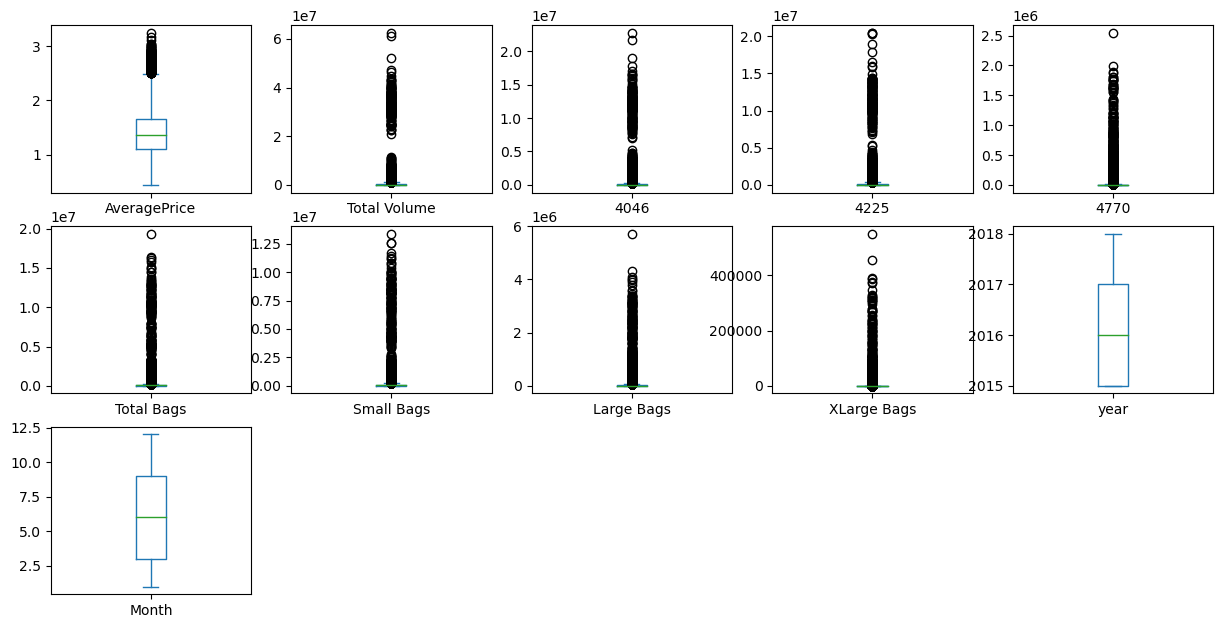

In [137]:
df.plot(kind='box', subplots=True, layout=(4,5),figsize=(15,10))

In [138]:
# calculate z score
z=np.abs(zscore(num))
print(z)

       AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          0.188689      0.227716  0.230816  0.199902  0.212091    0.234170   
1          0.139020      0.230427  0.231103  0.208054  0.211997    0.233350   
2          1.182069      0.212085  0.231007  0.154478  0.211325    0.234730   
3          0.809551      0.223444  0.230741  0.185350  0.211864    0.237096   
4          0.312861      0.231538  0.230891  0.208719  0.211834    0.236718   
...             ...           ...       ...       ...       ...         ...   
18244      0.556347      0.241373  0.230017  0.243857  0.212540    0.229301   
18245      0.755023      0.242296  0.230693  0.242277  0.212540    0.233594   
18246      1.152375      0.242331  0.230693  0.243090  0.205766    0.233463   
18247      1.301382      0.241625  0.230428  0.242651  0.205774    0.231866   
18248      0.531512      0.241253  0.229347  0.243170  0.210450    0.230807   

       Small Bags  Large Bags  XLarge Bags      yea

In [140]:
threshold=3
print(np.where(z<3))
print(num.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ...,  8,  9, 10], dtype=int64))
(18249, 11)


In [141]:
# assign the value to df_new which are less the threshold
data= df[(z<3).all(axis=1)]
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [142]:
data.shape

(17651, 14)

In [143]:
df.shape[0]- data.shape[0]

598

In [144]:
data.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
Month           0.107408
dtype: float64

In [145]:
# Skewness reduced to some extent
data.drop('Date', axis=1,inplace=True)
data.shape

(17651, 13)

In [146]:
num= data.select_dtypes(np.number)
num

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1


In [147]:
#Transformation to remove skewness
from sklearn.preprocessing import power_transform
transformed=power_transform(num)
transformed=pd.DataFrame(transformed)
transformed.columns= num.columns
transformed

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.210647,1.491383
1,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.210647,1.491383
2,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.210647,1.491383
3,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.210647,1.491383
4,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.210647,1.276081
...,...,...,...,...,...,...,...,...,...,...,...
17646,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,1.978707,-1.218907
17647,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,1.978707,-1.640288
17648,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,1.978707,-1.640288
17649,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,1.978707,-1.640288


In [148]:
transformed.skew()

AveragePrice    0.000464
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
year            0.227731
Month          -0.146554
dtype: float64

In [149]:
#PCA - to reduce curse of dimentionality

scaled=sc.fit_transform(transformed)
scaled= pd.DataFrame(scaled)
scaled.columns= transformed.columns
scaled

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.210618,1.491383
1,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.210618,1.491383
2,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.210618,1.491383
3,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.210618,1.491383
4,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.210618,1.276081
...,...,...,...,...,...,...,...,...,...,...,...
17646,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,1.978735,-1.218907
17647,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,1.978735,-1.640288
17648,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,1.978735,-1.640288
17649,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,1.978735,-1.640288


In [150]:
from sklearn.decomposition import PCA
pca= PCA()
 
principal_component=pca.fit_transform(scaled)

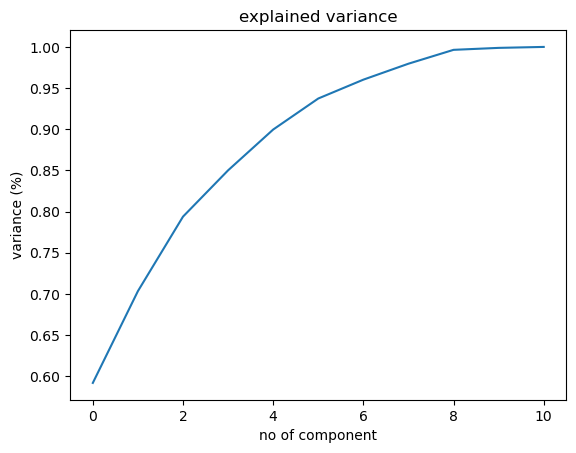

In [151]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of component')
plt.ylabel('variance (%)')
plt.title('explained variance')
plt.show()

In [152]:
## Graph shows 8 components has explained 98% variance of all features, so use 8
pca=PCA(n_components=8)
new_data= pca.fit_transform(scaled)
principal_x= pd.DataFrame(new_data,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
principal_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.994502,-1.929399,-0.276088,0.133245,0.204543,0.430444,0.446160,-0.293472
1,-1.059514,-1.905803,-0.315367,0.121114,0.196365,0.409416,0.549327,-0.344990
2,-0.441093,-2.069556,0.292058,0.648459,-0.173762,0.805004,0.881128,-0.219814
3,-0.794921,-2.018146,0.098551,0.523641,-0.077650,0.548295,0.617677,-0.119290
4,-1.056632,-1.815102,-0.030327,0.253157,0.109897,0.242019,0.533207,-0.150144
...,...,...,...,...,...,...,...,...
17646,-1.716615,2.482323,-0.186278,0.054436,0.290105,0.501152,-0.365258,0.024637
17647,-1.898280,2.699041,0.059134,-0.254415,0.372980,0.244940,-0.289920,-0.022690
17648,-1.589879,2.438074,0.005578,-1.165531,0.399509,0.231771,0.709121,0.907766
17649,-1.489177,2.445188,-0.067742,-1.241067,0.510939,0.196425,0.639415,0.882804


In [153]:
cat=pd.get_dummies(data['type'])
principal_x.shape , cat.shape

((17651, 8), (17651, 2))

In [154]:
pd.concat([principal_x,cat],axis=1,join='inner')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,conventional,organic
0,-0.994502,-1.929399,-0.276088,0.133245,0.204543,0.430444,0.446160,-0.293472,1,0
1,-1.059514,-1.905803,-0.315367,0.121114,0.196365,0.409416,0.549327,-0.344990,1,0
2,-0.441093,-2.069556,0.292058,0.648459,-0.173762,0.805004,0.881128,-0.219814,1,0
3,-0.794921,-2.018146,0.098551,0.523641,-0.077650,0.548295,0.617677,-0.119290,1,0
4,-1.056632,-1.815102,-0.030327,0.253157,0.109897,0.242019,0.533207,-0.150144,1,0
...,...,...,...,...,...,...,...,...,...,...
17646,-1.716615,2.482323,-0.186278,0.054436,0.290105,0.501152,-0.365258,0.024637,0,1
17647,-1.898280,2.699041,0.059134,-0.254415,0.372980,0.244940,-0.289920,-0.022690,0,1
17648,-1.589879,2.438074,0.005578,-1.165531,0.399509,0.231771,0.709121,0.907766,0,1
17649,-1.489177,2.445188,-0.067742,-1.241067,0.510939,0.196425,0.639415,0.882804,0,1


In [155]:
principal_x['type']= data['type']
principal_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,type
0,-0.994502,-1.929399,-0.276088,0.133245,0.204543,0.430444,0.446160,-0.293472,conventional
1,-1.059514,-1.905803,-0.315367,0.121114,0.196365,0.409416,0.549327,-0.344990,conventional
2,-0.441093,-2.069556,0.292058,0.648459,-0.173762,0.805004,0.881128,-0.219814,conventional
3,-0.794921,-2.018146,0.098551,0.523641,-0.077650,0.548295,0.617677,-0.119290,conventional
4,-1.056632,-1.815102,-0.030327,0.253157,0.109897,0.242019,0.533207,-0.150144,conventional
...,...,...,...,...,...,...,...,...,...
17646,-1.716615,2.482323,-0.186278,0.054436,0.290105,0.501152,-0.365258,0.024637,organic
17647,-1.898280,2.699041,0.059134,-0.254415,0.372980,0.244940,-0.289920,-0.022690,organic
17648,-1.589879,2.438074,0.005578,-1.165531,0.399509,0.231771,0.709121,0.907766,organic
17649,-1.489177,2.445188,-0.067742,-1.241067,0.510939,0.196425,0.639415,0.882804,organic


In [156]:
X=pd.get_dummies(principal_x)
X.shape

(17651, 10)

In [157]:
# Label encoder for target variable

le=LabelEncoder()
Y=le.fit_transform(data['region'])
Y.shape

(17651,)

In [158]:
pd.DataFrame(Y,columns=['region']).value_counts()

region
0         338
16        338
49        338
44        338
39        338
38        338
35        338
34        338
32        338
30        338
26        338
23        338
19        338
18        338
27        338
10        338
2         338
8         338
9         338
5         338
11        338
4         338
12        338
13        338
20        337
1         337
28        337
50        336
33        336
14        336
41        336
40        336
24        335
31        335
21        333
25        333
48        333
7         332
53        332
22        331
17        331
36        330
3         329
37        328
47        328
43        326
29        325
46        307
42        301
45        292
6         290
15        272
52        256
51        169
dtype: int64

In [159]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [160]:
final_data= data.drop(['Total Volume','Total Bags'], axis=1)

<Axes: >

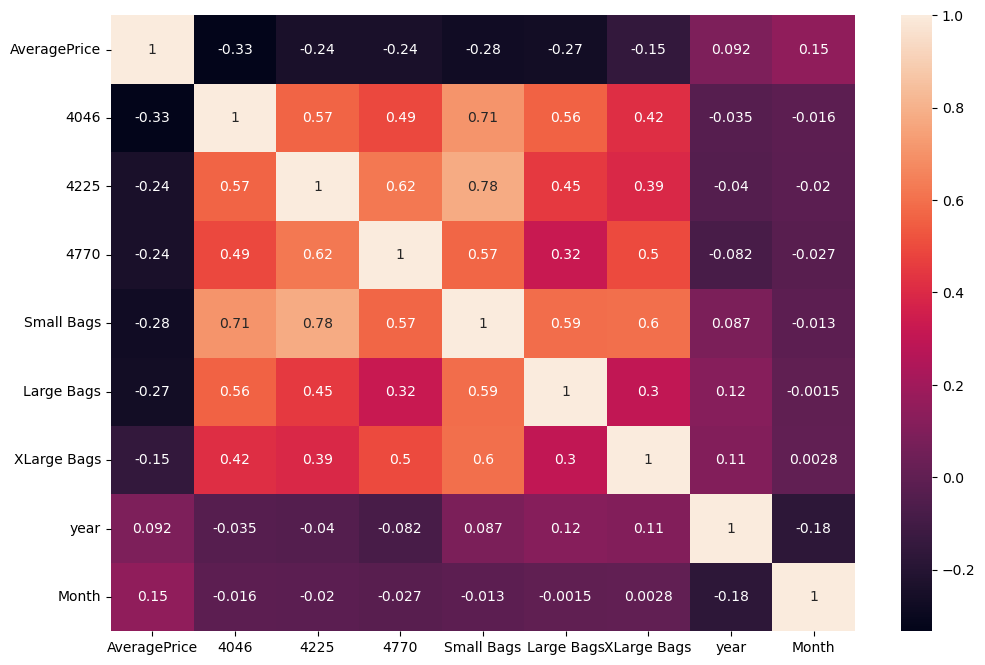

In [161]:
plt.figure(figsize=(12,8))
sns.heatmap(final_data.corr(), annot=True)

In [162]:
final_data.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany,11


In [163]:
final_data.shape

(17651, 11)

In [164]:
final_data.skew()

AveragePrice    0.377432
4046            4.909848
4225            4.455745
4770            5.117170
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
Month           0.107408
dtype: float64

In [165]:
final_data.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany,11


In [166]:
final_data['region'].value_counts()

Albany                 338
HarrisburgScranton     338
Syracuse               338
SouthCarolina          338
Roanoke                338
RichmondNorfolk        338
Plains                 338
Pittsburgh             338
Philadelphia           338
NorthernNewEngland     338
Nashville              338
Louisville             338
Indianapolis           338
Houston                338
NewOrleansMobile       338
Chicago                338
BaltimoreWashington    338
Detroit                338
Denver                 338
DallasFtWorth          338
Boston                 338
BuffaloRochester       338
Columbus               338
CincinnatiDayton       338
Jacksonville           337
Atlanta                337
NewYork                337
PhoenixTucson          336
SanDiego               336
Sacramento             336
GrandRapids            336
Tampa                  336
Orlando                335
MiamiFtLauderdale      335
Midsouth               333
StLouis                333
LasVegas               333
W

In [167]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
final_data.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany,11


In [168]:
final_data.drop('region',axis=1,inplace=True)
daata=pd.get_dummies(final_data)

In [169]:
# transformation:

from sklearn.preprocessing import power_transform
transformed=power_transform(daata)
sc=StandardScaler()
standard=sc.fit_transform(transformed)
standard.shape

(17651, 11)

In [170]:
balance_X,balance_Y=smt.fit_resample(standard,Y)
balance_X.shape  , balance_Y.shape

((18252, 11), (18252,))

In [171]:
# FInd best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(balance_X,balance_Y,random_state=i,test_size=.33)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)
    

Best accuracy is  0.5262284196547145 on Random State = 2


In [173]:
#Random State selection is:  2

In [174]:
x_train,x_test,y_train,y_test= train_test_split(balance_X,balance_Y,random_state=2,test_size=.20)

In [175]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [ ]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
   
    print('*'*50)

In [ ]:
#Hypertuning:
params = {'n_estimators' : [100,150,200,300,500],
    'max_features' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

In [ ]:
GCV=GridSearchCV(Bag_model,param_grid=params,cv=5,n_jobs=-1,verbose=2)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
GCV.best_estimator_

In [ ]:
GCV.best_params_

In [ ]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

In [ ]:
#Save the file
import joblib

In [ ]:
joblib.dump(GCV.best_estimator_,'Avacado.pkl')

In [ ]:
                   #Thanks